In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)
print(california_housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
X = X[['MedInc', 'AveRooms']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


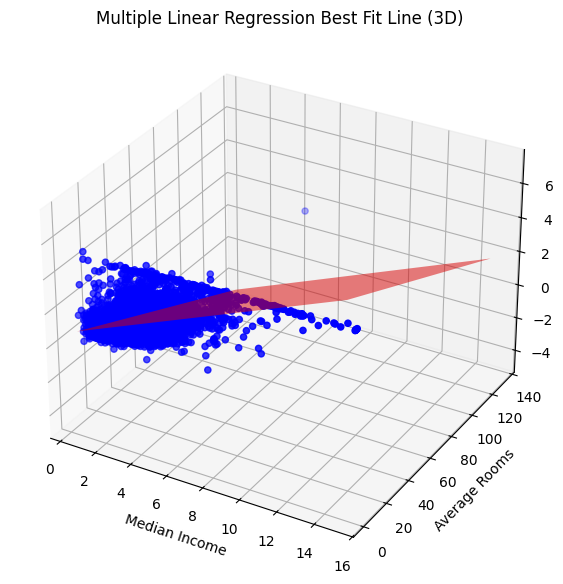

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MedInc'], X_test['AveRooms'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()